# 四种异常值处理

## 基于分位数找异常值

In [ ]:
import numpy as np
np.random.seed(42)  # 为了结果的可重复性设置随机种子
X = np.random.rand(50, 1)  # 2维数据
X

In [ ]:
X[0,0]=3
X[1,0]=2

In [ ]:
import pandas as pd

# 假设df是一个Pandas DataFrame，包含了你想要分析的数据集
# 'column_name'是你想要检测异常值的列名

#随机一个dataframe
df=pd.DataFrame(X,columns=['column_name'])

# 设置分位数，例如四分位数
Q1 = df['column_name'].quantile(0.25)  # 第一四分位数（25%）
Q3 = df['column_name'].quantile(0.75)  # 第三四分位数（75%）

# 计算四分位数范围（IQR）
IQR = Q3 - Q1

# 定义下界和上界来识别异常值
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 标记异常值
df['outlier'] = df['column_name'].apply(lambda x: 'Yes' if x < lower_bound or x > upper_bound else 'No')

# 打印出被标记为异常值的行
df[df['outlier'] == 'Yes']

## Z-score

## 基于DBSCAN算法找异常值

(1500, 2)
--------------------
(1600, 2)


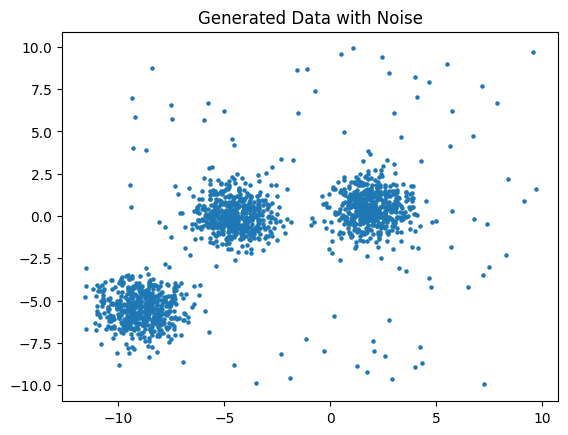

In [1]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs #用于做随机

# 生成样本数据
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state) #y没有用

print(X.shape)
print('-'*20)

# 增加一些噪声点，往X中拼接噪声点
rng = np.random.RandomState(74) #实例化一个随机数生成器
X = np.concatenate([X, rng.uniform(low=-10, high=10, size=(100, 2))]) #将随机数组和X沿着一个指定轴连接起来 加入随机的异常值
print(X.shape) #1600个样本，2列特征，100个噪声点
# 可视化生成的数据
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.title("Generated Data with Noise")
plt.show()

In [2]:
X[0:5] #取五行看看情况

array([[ -5.19811282,   0.64186932],
       [ -5.75229538,   0.41862711],
       [-10.84489837,  -7.55352273],
       [ -4.57098483,  -0.80101741],
       [ -3.51916215,   0.0393449 ]])

[-1  0  1  2]
131
[0 1 2]


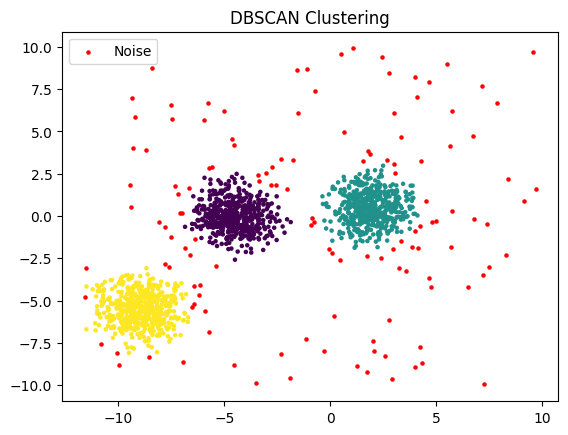

In [3]:
# 使用DBSCAN算法
db = DBSCAN(eps=0.5, min_samples=5).fit(X) # eps是半径，min_samples是最少包含几个点才会被认为是核心点
labels = db.labels_ # 得到每个点的类别
print(np.unique(labels)) # 得到类别有-1 0 1 2 总计4个类别
# 标签为-1的点是噪声点
noise_mask = (labels == -1)
print(np.sum(noise_mask)) # 噪声点的数量
print(np.unique(labels[~noise_mask])) # 得到噪声点的mask
# 可视化聚类结果
plt.scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=labels[~noise_mask], s=5, cmap='viridis') # 正常点用彩色标注
plt.scatter(X[noise_mask, 0], X[noise_mask, 1], c='red', s=5, label='Noise') # 噪声点用红色标注
plt.title("DBSCAN Clustering")
plt.legend()
plt.show()

## 孤立森林 

[-1  1]


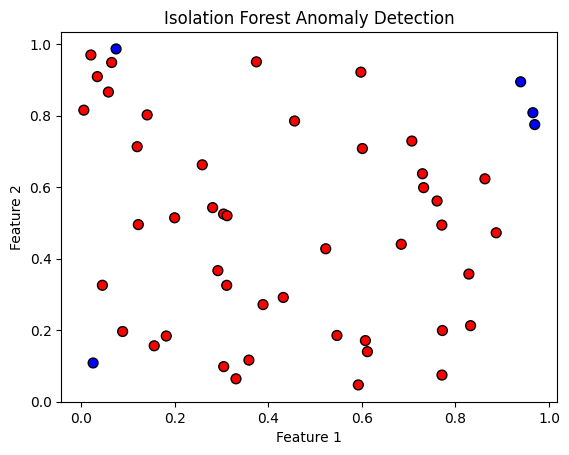

In [6]:
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# 随机生成50个数据点
np.random.seed(42)  # 为了结果的可重复性设置随机种子
X = np.random.rand(50, 2)  # 2维数据,2列好画图来解释

# 初始化Isolation Forest模型，contamination参数表示异常值比例，默认0.1 random_state为随机种子，用于随机分割点 
iso_forest = IsolationForest(random_state=42, contamination=0.1)

# 训练模型，随机建树的过程
iso_forest.fit(X)

# 预测每个点的异常分数，在树中的高度越低，越可能是异常点
scores = iso_forest.decision_function(X)

# print(scores)
# 将异常分数转换为1（正常）和-1（异常）的标签
labels = iso_forest.predict(X)
print(np.unique(labels))
# 绘制数据点和异常点
# plt.cm.bwr 是一个预定义的颜色映射，表示从蓝色到白色再到红色的渐变色。这个颜色映射常用于表示数据的正负性或其他两极对立的属性
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.bwr, edgecolor='k', s=50)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [8]:
#把scores和labels拼接到一起
import pandas as pd
df=pd.DataFrame(np.c_[X,scores,labels],columns=['Feature 1','Feature 2','scores','labels'])
df

,Feature 1,Feature 2,scores,labels
0,0.374540,0.950714,0.001053,1.0
1,0.731994,0.598658,0.100556,1.0
2,0.156019,0.155995,0.053615,1.0
3,0.058084,0.866176,0.050242,1.0
4,0.601115,0.708073,0.071848,1.0
5,0.020584,0.969910,0.004049,1.0
6,0.832443,0.212339,0.019976,1.0
7,0.181825,0.183405,0.062738,1.0
8,0.304242,0.524756,0.108842,1.0
9,0.431945,0.291229,0.078362,1.0


In [9]:
labels[labels==-1]

array([-1, -1, -1, -1, -1])